In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.feature_names)
print(iris.target_names)
print(iris.data[0])
print(iris.target[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[5.1 3.5 1.4 0.2]
0


In [2]:
for i in range(len(iris.target)):
    print("Example %d : label %s , features %s" %(i,iris.target[i],iris.data[i]))

Example 0 : label 0 , features [5.1 3.5 1.4 0.2]
Example 1 : label 0 , features [4.9 3.  1.4 0.2]
Example 2 : label 0 , features [4.7 3.2 1.3 0.2]
Example 3 : label 0 , features [4.6 3.1 1.5 0.2]
Example 4 : label 0 , features [5.  3.6 1.4 0.2]
Example 5 : label 0 , features [5.4 3.9 1.7 0.4]
Example 6 : label 0 , features [4.6 3.4 1.4 0.3]
Example 7 : label 0 , features [5.  3.4 1.5 0.2]
Example 8 : label 0 , features [4.4 2.9 1.4 0.2]
Example 9 : label 0 , features [4.9 3.1 1.5 0.1]
Example 10 : label 0 , features [5.4 3.7 1.5 0.2]
Example 11 : label 0 , features [4.8 3.4 1.6 0.2]
Example 12 : label 0 , features [4.8 3.  1.4 0.1]
Example 13 : label 0 , features [4.3 3.  1.1 0.1]
Example 14 : label 0 , features [5.8 4.  1.2 0.2]
Example 15 : label 0 , features [5.7 4.4 1.5 0.4]
Example 16 : label 0 , features [5.4 3.9 1.3 0.4]
Example 17 : label 0 , features [5.1 3.5 1.4 0.3]
Example 18 : label 0 , features [5.7 3.8 1.7 0.3]
Example 19 : label 0 , features [5.1 3.8 1.5 0.3]
Example 20

In [3]:
import numpy as np
test = [0,50,100]
#training data 준비과정
#세 개의 데이터들을 데이터 변수에서 제거
train_data = np.delete(iris.data,test,axis =0)
train_target = np.delete(iris.target,test,axis =0)

#test data 준비
test_data = iris.data[test]
test_target = iris.target[test]

#결정 트리 생성
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(train_data,train_target)

print(test_target)
print(clf.predict(test_data))

[0 1 2]
[0 1 2]


In [4]:
#p.259
a = np.array([[1,2],[3,4]])
print(a.flatten('C'))
print(a.flatten('F'))

[1 2 3 4]
[1 3 2 4]


<function matplotlib.pyplot.legend(*args, **kwargs)>

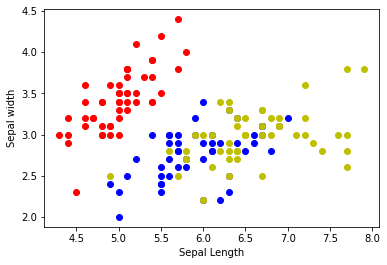

In [5]:
import matplotlib.pyplot as plt
sepal = iris.data[:,0:2]
kind = iris.target
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.plot(sepal[kind==0][:,0],sepal[kind==0][:,1],"ro",label="Setosa")
plt.plot(sepal[kind==1][:,0],sepal[kind==1][:,1],"bo",label="Versicolor")
plt.plot(sepal[kind==2][:,0],sepal[kind==2][:,1],"yo",label="Verginica")
plt.legend

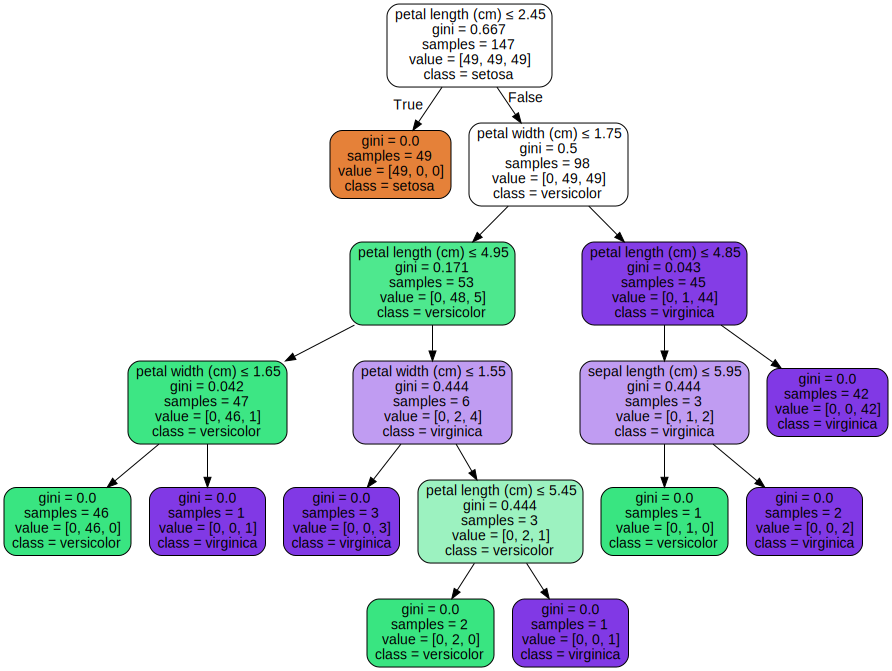

In [6]:
# 시각화
import graphviz
dot_data = tree.export_graphviz(clf,out_file=None)
graph = graphviz.Source(dot_data)
graph.render("iris")
dot_data = tree.export_graphviz(clf,out_file=None,feature_names=iris.feature_names,class_names=iris.target_names,
                                filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [7]:
from sklearn.model_selection import train_test_split
X = np.arange(12).reshape((6,2))
print(X)
Y = range(6)
print(list(Y))

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
[0, 1, 2, 3, 4, 5]


In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

[[6 7]
 [0 1]
 [8 9]
 [2 3]]
[[10 11]
 [ 4  5]]
[3, 0, 4, 1]
[5, 2]


In [9]:
X = iris.data
Y = iris.target
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,Y_train)
predicts = clf.predict(X_test)
print('예측 : \n',predicts)
print('정답 : \n',Y_test)

예측 : 
 [0 0 2 2 0 0 1 2 0 0 0 0 1 1 2 2 1 2 1 1 0 0 2 0 2 0 2 2 0 0 0 2 1 0 0 1 2
 1 2 1 1 2 2 1 0 2 2 2 1 0]
정답 : 
 [0 0 2 2 0 0 1 2 0 0 0 0 1 1 2 2 1 2 1 1 0 0 2 0 1 0 2 2 0 0 0 2 1 0 0 1 2
 1 2 1 1 2 2 1 0 2 2 1 1 0]


In [10]:
from sklearn.metrics import accuracy_score
a = [1,2,3,4,5,6,7,8,9,10]
b = [1,2,4,4,5,6,7,8,9,10]
print(accuracy_score(a,b))

0.9


In [11]:
print(accuracy_score(Y_test,predicts))
print(accuracy_score(predicts,Y_test))

0.96
0.96


In [12]:
#최근접 이웃 탐색(Nearest Neighbor Search) 모델

from sklearn.neighbors import KNeighborsClassifier
X=[[0],[1],[2],[3],[4],[5]]
Y=[0,0,0,1,1,1]
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X,Y)


KNeighborsClassifier(n_neighbors=3)

In [13]:
print(neigh.predict([[2.8]]))

[1]


In [14]:
print(neigh.predict_proba([[2.8]]))

[[0.33333333 0.66666667]]


In [15]:
print(neigh.predict([[2.3]]))

[0]


In [16]:
print(neigh.predict_proba([[2.3]]))

[[0.66666667 0.33333333]]


In [17]:
X = iris.data
Y = iris.target
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.5)
clf = KNeighborsClassifier()
clf.fit(X_train,Y_train)
predicts = clf.predict(X_test)
print('예측 : \n',predicts)
print('정답 : \n',Y_test)
print(accuracy_score(Y_test,predicts))

예측 : 
 [2 1 1 1 1 1 1 2 0 0 0 0 2 1 1 1 0 1 1 0 1 2 0 0 0 1 2 1 2 0 1 0 1 0 2 2 0
 1 2 2 1 0 1 0 2 1 2 1 0 1 2 2 1 1 0 2 0 2 0 1 2 1 2 1 2 1 2 2 2 0 1 2 2 1
 1]
정답 : 
 [2 1 1 1 1 1 1 2 0 0 0 0 2 1 1 1 0 1 1 0 1 2 0 0 0 1 2 1 2 0 1 0 1 0 1 2 0
 1 2 2 1 0 1 0 2 1 2 1 0 2 2 2 1 1 0 2 0 2 0 1 2 1 2 1 2 1 2 2 2 0 1 2 2 1
 1]
0.9733333333333334


In [18]:
# 나만의 분류자 만들기 
import random
class myKNN():
    def fit(self,X_train,Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
    def predict(self,X_test):
        predictions = []
        for row in X_test:
            lable = random.choice(self.Y_train)
            predictions.append(lable)
        return predictions

In [19]:
clf = myKNN()
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

0.22666666666666666


In [20]:
import numpy as np
def euc(p1,p2):
    return np.sqrt(np.sum(np.power(p2-p1,2)))

p1 = np.array([1,1])
p2 = np.array([4,4])
euc(p1,p2)

4.242640687119285

In [21]:
from scipy.spatial import distance

def euc(a,b):
    return distance.euclidean(a,b)
p1=np.array([1,1,3,3])
p2=np.array([4,4,5,5])
euc(p1,p2)

5.0990195135927845

In [22]:
def euc(a,b):
    return distance.euclidean(a,b)

class eucKNN():
    def fit(self,X_train,Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
    def predict(self,X_test):
        predictions = []
        for row in X_test:
            lable = self.closest(row)
            predictions.append(lable)
        return predictions
    def closest(self,row):
        best_dist = euc(row,self.X_train[0])
        best_index=0
        for i in range(1,len(self.X_train)):
            dist = euc(row,self.X_train[i])
            if dist <best_dist:
                best_dist = dist
                best_index = i
        return self.Y_train[best_index]

In [23]:
clf = eucKNN()
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)
print(accuracy_score(Y_test,predictions))

0.9333333333333333


In [24]:
from sklearn import svm
clf = svm.SVC(gamma=0.001,C=100.)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_test)
print(accuracy_score(Y_test,predictions))

0.96


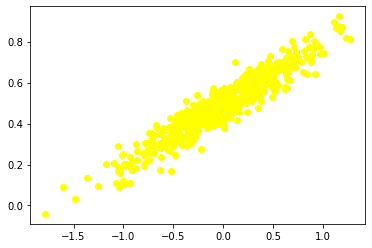

In [25]:
#p.276
import numpy as np
import matplotlib.pyplot as plt 
points = 500
vectors = []
for i in range(points):
    x1 = np.random.normal(0.0,0.5)
    y1 = x1*0.3+0.5+np.random.normal(0.0,0.05)
    vectors.append([x1,y1])
x_data = [v[0] for v in vectors]
y_data = [v[1] for v in vectors]
plt.scatter(x_data,y_data,color='yellow',label='TrainingData')

In [26]:
from tensorflow.keras import models
from tensorflow.keras import layers

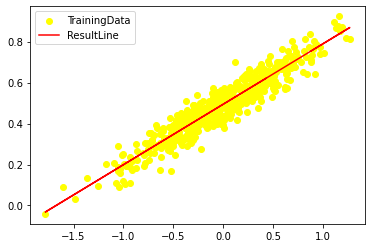

In [32]:
#딥러닝 모델링
model = models.Sequential()
model.add(layers.Dense(units=1,input_shape=[1]))
model.compile(loss='mse',optimizer='SGD')
history = model.fit(x_data,y_data,epochs=100,verbose=False)
#경계선 그래프
weights, bias = model.get_weights()
result_line = x_data * weights[0] +bias
plt.scatter(x_data,y_data,color='yellow',label='TrainingData')
plt.plot(x_data,result_line,color='red',label='ResultLine')
plt.legend()
plt.show()

In [33]:
test = np.array([[-1],[0],[1]])
pred = model.predict(test)
print(pred)

1/1 [==============================] - 0s 33ms/step
[[0.19912028]
 [0.49460775]
 [0.7900952 ]]
